<a href="https://colab.research.google.com/github/yweslakarep123/ant_colony_iris/blob/main/code_ant_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>FULL CODE</h1>

<ipython-input-25-b05239ae46c7>:32: RuntimeWarning: divide by zero encountered in scalar divide
  pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])


Adjusted Rand Index (ARI): 0.7302382722834697
Silhouette Score: 0.5528190123564095


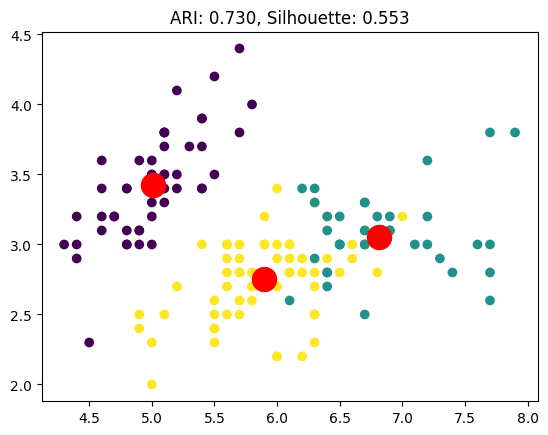

In [25]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score

class AntColonyClustering:
    def __init__(self, data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
        self.data = data
        self.num_clusters = num_clusters
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.pheromone = np.ones((len(data), num_clusters)) * pheromone_init
        self.best_centroids = None

    def initialize_centroids(self):
        indices = np.random.choice(len(self.data), self.num_clusters, replace=False)
        return self.data[indices]

    def assign_clusters(self, centroids):
        distances = cdist(self.data, centroids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def update_pheromone(self, assignments, centroids):
        pheromone_delta = np.zeros_like(self.pheromone)
        for i in range(len(self.data)):
            pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])
        self.pheromone = (1 - self.evaporation_rate) * self.pheromone + pheromone_delta

    def update_centroids(self, assignments):
        centroids = np.zeros((self.num_clusters, self.data.shape[1]))
        for k in range(self.num_clusters):
            cluster_points = self.data[assignments == k]
            if len(cluster_points) > 0:
                centroids[k] = cluster_points.mean(axis=0)
            else:
                centroids[k] = self.data[np.random.choice(len(self.data))]
        return centroids

    def fit(self):
        best_assignments = None
        best_centroids = None
        best_score = np.inf

        for iteration in range(self.num_iterations):
            centroids = self.initialize_centroids()
            for ant in range(self.num_ants):
                assignments = self.assign_clusters(centroids)
                score = self.calculate_score(assignments, centroids)
                if score < best_score:
                    best_score = score
                    best_assignments = assignments
                    best_centroids = centroids
                self.update_pheromone(assignments, centroids)
                centroids = self.update_centroids(assignments)

        self.best_centroids = best_centroids
        return best_assignments

    def calculate_score(self, assignments, centroids):
        score = 0.0
        for i in range(len(self.data)):
            score += np.linalg.norm(self.data[i] - centroids[assignments[i]])
        return score

    @staticmethod
    def evaluate_ari(true_labels, predicted_labels):
        ari = adjusted_rand_score(true_labels, predicted_labels)
        return ari

    @staticmethod
    def evaluate_silhouette(data, predicted_labels):
        silhouette_avg = silhouette_score(data, predicted_labels)
        return silhouette_avg

# Contoh penggunaan
if __name__ == "__main__":
    data = load_iris().data
    true_labels = load_iris().target

    aco_clustering = AntColonyClustering(data, num_clusters=3, num_ants=10, num_iterations=50)
    predicted_labels = aco_clustering.fit()
    centroids = aco_clustering.best_centroids

    # Evaluasi hasil clustering
    ari = AntColonyClustering.evaluate_ari(true_labels, predicted_labels)
    silhouette_avg = AntColonyClustering.evaluate_silhouette(data, predicted_labels)

    print(f"Adjusted Rand Index (ARI): {ari}")
    print(f"Silhouette Score: {silhouette_avg}")

    # Visualisasi hasil clustering
    plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
    plt.title(f'ARI: {ari:.3f}, Silhouette: {silhouette_avg:.3f}')
    plt.show()
